In [62]:
from google.colab import auth
import gspread
from google.auth import default

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den

from tensorflow.keras.metrics import RootMeanSquaredError as rmse

import pandas as pd
import matplotlib.pyplot as plt

In [64]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

sheet = gc.open('SomDocs DL-01').sheet1
rows = sheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})

In [65]:
x = df[["Input"]] .values
y = df[["Output"]].values

In [66]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)

In [67]:
ai_brain = Seq([
    Den(8,activation = 'relu',input_shape=[1]),
    Den(15,activation = 'relu'),
    Den(1),
])

ai_brain.compile(optimizer = 'rmsprop',loss = 'mse')

ai_brain.fit(x_train,y_train,epochs=2000)
ai_brain.fit(x_train,y_train,epochs=2000)

Streaming output truncated to the last 5000 lines.
Epoch 1055/2000
1/1 [==============================] - 0s 10ms/step - loss: 10710.6074
Epoch 1056/2000
1/1 [==============================] - 0s 5ms/step - loss: 10703.2871
Epoch 1057/2000
1/1 [==============================] - 0s 7ms/step - loss: 10695.9590
Epoch 1058/2000
1/1 [==============================] - 0s 7ms/step - loss: 10688.6250
Epoch 1059/2000
1/1 [==============================] - 0s 5ms/step - loss: 10681.2822
Epoch 1060/2000
1/1 [==============================] - 0s 18ms/step - loss: 10673.9316
Epoch 1061/2000
1/1 [==============================] - 0s 5ms/step - loss: 10666.5752
Epoch 1062/2000
1/1 [==============================] - 0s 5ms/step - loss: 10659.2100
Epoch 1063/2000
1/1 [==============================] - 0s 5ms/step - loss: 10651.8379
Epoch 1064/2000
1/1 [==============================] - 0s 6ms/step - loss: 10644.4580
Epoch 1065/2000
1/1 [==============================] - 0s 9ms/step - loss: 10637.0713
E

<Axes: >

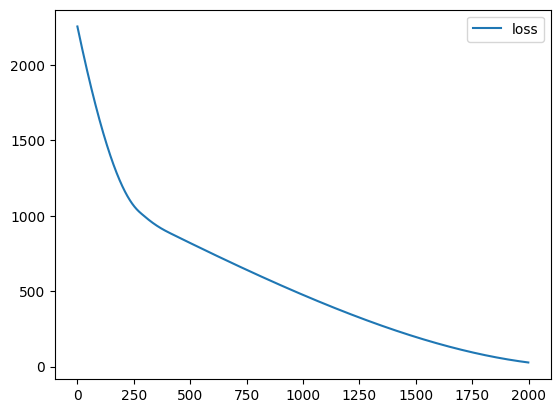

In [69]:
loss_plot = pd.DataFrame(ai_brain.history.history)
loss_plot.plot()

In [70]:
err = rmse()
preds = ai_brain.predict(x_test)
err(y_test,preds)

1/1 [==============================] - 0s 68ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=6.7197824>

In [74]:
x_n1 = [[9]]
x_n_n = scaler.transform(x_n1)
ai_brain.predict(x_n_n)

1/1 [==============================] - 0s 23ms/step


array([[94.651985]], dtype=float32)